Basic form:
$$
\text{Trade}(i \leftrightarrow j) \approx \gamma \frac{\text{GDP}_i \times \text{GDP}_j}{\text{Distance}(i,j)}
$$

$$
\text{Trade}(i \leftrightarrow j) \approx G \frac{\text{GDP}_i \times \text{GDP}_j}{\text{Distance}(i,j)}
$$

General form:

$$
X(i \leftarrow j) := X_{ij} = G M_i S_j \phi_{ij}
$$

Where
$X_{ij} \in \mathbb{R}^+$ — trade volume directed from exporter $j$ to importer $i$;

$M_{i} \in \mathbb{R}^+$ — characteristics of import market i that promote demand from all origins;

$S_{i} \in \mathbb{R}^+$ — capabilities of exporter j as a supplier to all destinations;

$\phi_{ij} ∈ [0, 1]$ — bilateral accessibility of importer i to exporter j;

$G ∈ \mathbb{R}^+$ — parameter that is constant ∀i, j (and possibly ∀t).

Try doing basic form first, can move on from there.

Wikipedia form for econometric applications:
$$
F(i \leftarrow j)=F_{ij} = G \frac{ M_i^{\beta_1} M_j^{\beta_2} }{ D_{ij}^{\beta_3}} \eta_{ij}
$$

$$
F(i \leftarrow j)=F_{ij} = \beta_0 \frac{ M_i^{\beta_1} M_j^{\beta_2} }{ D_{ij}^{\beta_3}} \eta_{ij}
$$

$$
F(i \leftarrow j)=F_{ij} = \beta_0 \frac{ M_i^{\beta_1} M_j^{\beta_2} }{ D_{ij}^{\beta_3}} \varepsilon_{ij}
$$



The traditional approach to estimating this equation consists in taking logs of both sides, leading to a log-log model of the form (note: constant G becomes part of <math>\beta_0</math>):

$$
\ln (F_{ij}) = \beta_0 + \beta_1 \ln (M_i) + \beta_2 \ln (M_j) - \beta_3 \ln (D_{ij}) + \varepsilon_{ij}
$$.

$$
\ln (F_{ij}) = \beta_0 + \beta_1 \ln (M_i) + \beta_2 \ln (M_j) - \beta_3 \ln (D_{ij}) + \eta_{ij}
$$.

However, this approach has two major problems. First, it obviously cannot be used when there are observations for which $F_{ij}$ is equal to zero. Second, Santos Silva and Tenreyro (2006) argued that estimating the log-linearized equation by [[least squares]] (OLS) can lead to significant biases if the researcher believes the true model to be nonlinear in its parameters. As an alternative, these authors have suggested that the model should be estimated in its multiplicative form, i.e.,

$$
F_{ij} = \exp [ \beta_0 + \beta_1 \ln (M_i) + \beta_2 \ln (M_j) - \beta_3 \ln (D_{ij})] \eta_{ij}
$$


# Data Importing

In [29]:
import pandas as pd
import numpy as np

In [30]:
int('All_Traffic 2011.csv'[12:16])

2011

In [31]:
import data_wrangler

X_train, y_train, X_test, y_test = data_wrangler.file_processor()

In [32]:
X_train

,Average_Mileage,Population_origin,Population_dest,Agriculture_forestry_fishing_and_hunting_origin,Construction_origin,Manufacturing_origin,Natural_Resources_origin,Retail_trade_origin,Services_origin,Transportation_and_warehousing_origin,...,Wholesale_trade_origin,Agriculture_forestry_fishing_and_hunting_dest,Construction_dest,Manufacturing_dest,Natural_Resources_dest,Retail_trade_dest,Services_dest,Transportation_and_warehousing_dest,Utilities_dest,Wholesale_trade_dest
0,3.912023,18.974292,18.974292,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,...,18.172399,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,16.481296,18.172399
1,4.522430,18.974292,1.100462,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,...,18.172399,13.187235,14.678342,15.891228,13.568236,14.965092,17.575727,14.747135,14.486767,14.802054
2,5.267321,18.974292,7.610982,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,...,18.172399,13.474845,16.189736,16.600368,14.367080,16.379357,19.169472,14.971073,15.130842,16.158769
3,5.793802,18.974292,0.572526,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,...,18.172399,12.009894,12.264771,13.463678,12.071930,12.825269,15.154602,11.177257,13.993338,12.190177
4,6.568714,18.974292,0.626198,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,...,18.172399,12.655717,13.872356,15.127960,12.772411,14.485549,16.953915,13.774288,13.868486,13.831416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,6.724626,2.321951,0.890786,14.619330,16.516067,17.709095,14.895352,17.530075,19.532171,16.195313,...,16.843674,12.871191,13.939058,14.392379,16.244745,14.261049,16.374224,14.924803,13.037705,13.905951
1845,6.840640,2.321951,7.756797,14.619330,16.516067,17.709095,14.895352,17.530075,19.532171,16.195313,...,16.843674,16.214080,16.763915,17.701075,17.249350,17.142861,19.437981,15.833691,15.897185,17.322304
1846,6.476208,2.321951,4.683821,14.619330,16.516067,17.709095,14.895352,17.530075,19.532171,16.195313,...,16.843674,15.985933,16.372212,17.517108,16.189657,16.673102,19.082995,15.606863,14.959761,16.403571
1847,5.379731,2.321951,3.139606,14.619330,16.516067,17.709095,14.895352,17.530075,19.532171,16.195313,...,16.843674,14.458980,15.943886,17.302286,14.659454,16.146729,18.766836,15.329120,14.260509,16.244829


All data is logged, so have to unlog, add, and relog. Goal is to convert down to three features: Mileage, origin economic activity, and destination economic activity

In [33]:
unlogged_df = X_train.copy().drop(columns=["Population_origin","Population_dest"])
#unlogged_df = unlogged_df.map(lambda x: np.power(x, 10))
unlogged_df = unlogged_df.map(np.exp)

origin  = unlogged_df.filter(regex='origin')
dest    = unlogged_df.filter(regex='dest')
mileage = unlogged_df.filter(regex='Mileage')

# Create sum of rows
origin_sum = origin.sum(axis=1)
dest_sum   = dest  .sum(axis=1)

sums = pd.DataFrame({"sum_origin": origin_sum, "sum_dest": dest_sum})
#sums_logged = sums.map(np.log)

combined_df = pd.concat([mileage, sums], axis=1)
logged_df = combined_df.map(np.log)
X_train_three = logged_df
X_train_three

,Average_Mileage,sum_origin,sum_dest
0,3.912023,20.998887,20.998887
1,4.522430,20.998887,17.989073
2,5.267321,20.998887,19.418125
3,5.793802,20.998887,15.747723
4,6.568714,20.998887,17.326789
...,...,...,...
1844,6.724626,19.916998,17.333539
1845,6.840640,19.916998,19.953438
1846,6.476208,19.916998,19.541373
1847,5.379731,19.916998,19.183436


In [34]:
unlogged_test_df = X_test.copy().drop(columns=["Population_origin","Population_dest"])
#unlogged_df = unlogged_df.map(lambda x: np.power(x, 10))
unlogged_test_df = unlogged_test_df.map(np.exp)

origin  = unlogged_test_df.filter(regex='origin')
dest    = unlogged_test_df.filter(regex='dest')
mileage = unlogged_test_df.filter(regex='Mileage')

# Create sum of rows
origin_sum = origin.sum(axis=1)
dest_sum   = dest  .sum(axis=1)

sums = pd.DataFrame({"sum_origin": origin_sum, "sum_dest": dest_sum})
#sums_logged = sums.map(np.log)

combined_test_df = pd.concat([mileage, sums], axis=1)
logged_test_df = combined_test_df.map(np.log)
X_test_three = logged_test_df
X_test_three

,Average_Mileage,sum_origin,sum_dest
0,3.912023,21.113697,21.113697
1,4.522430,21.113697,18.112553
2,5.267321,21.113697,19.494302
3,5.793802,21.113697,15.695867
4,6.568714,21.113697,17.487755
...,...,...,...
1844,6.724626,19.956881,17.319699
1845,6.840640,19.956881,19.987993
1846,6.476208,19.956881,19.572032
1847,5.379731,19.956881,19.203443


In [35]:
X_train

,Average_Mileage,Population_origin,Population_dest,Agriculture_forestry_fishing_and_hunting_origin,Construction_origin,Manufacturing_origin,Natural_Resources_origin,Retail_trade_origin,Services_origin,Transportation_and_warehousing_origin,...,Wholesale_trade_origin,Agriculture_forestry_fishing_and_hunting_dest,Construction_dest,Manufacturing_dest,Natural_Resources_dest,Retail_trade_dest,Services_dest,Transportation_and_warehousing_dest,Utilities_dest,Wholesale_trade_dest
0,3.912023,18.974292,18.974292,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,...,18.172399,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,16.481296,18.172399
1,4.522430,18.974292,1.100462,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,...,18.172399,13.187235,14.678342,15.891228,13.568236,14.965092,17.575727,14.747135,14.486767,14.802054
2,5.267321,18.974292,7.610982,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,...,18.172399,13.474845,16.189736,16.600368,14.367080,16.379357,19.169472,14.971073,15.130842,16.158769
3,5.793802,18.974292,0.572526,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,...,18.172399,12.009894,12.264771,13.463678,12.071930,12.825269,15.154602,11.177257,13.993338,12.190177
4,6.568714,18.974292,0.626198,13.689975,17.485232,18.476219,15.014851,18.051559,20.690663,17.472574,...,18.172399,12.655717,13.872356,15.127960,12.772411,14.485549,16.953915,13.774288,13.868486,13.831416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,6.724626,2.321951,0.890786,14.619330,16.516067,17.709095,14.895352,17.530075,19.532171,16.195313,...,16.843674,12.871191,13.939058,14.392379,16.244745,14.261049,16.374224,14.924803,13.037705,13.905951
1845,6.840640,2.321951,7.756797,14.619330,16.516067,17.709095,14.895352,17.530075,19.532171,16.195313,...,16.843674,16.214080,16.763915,17.701075,17.249350,17.142861,19.437981,15.833691,15.897185,17.322304
1846,6.476208,2.321951,4.683821,14.619330,16.516067,17.709095,14.895352,17.530075,19.532171,16.195313,...,16.843674,15.985933,16.372212,17.517108,16.189657,16.673102,19.082995,15.606863,14.959761,16.403571
1847,5.379731,2.321951,3.139606,14.619330,16.516067,17.709095,14.895352,17.530075,19.532171,16.195313,...,16.843674,14.458980,15.943886,17.302286,14.659454,16.146729,18.766836,15.329120,14.260509,16.244829


In [36]:
X_train["Average_Mileage"].unique()

array([3.91202301, 4.52243015, 5.26732097, ..., 7.50272915, 7.50636263,
       5.59842196])

In [37]:
print(logged_df["Average_Mileage"].unique())

[3.91202301 4.52243015 5.26732097 ... 7.50272915 7.50636263 5.59842196]


In [38]:
combined_df[1000:1010]

,Average_Mileage,sum_origin,sum_dest
1048,452.892982,81863411.0,5604886.0
1049,520.259819,81863411.0,87155604.0
1050,686.896537,81863411.0,81698369.0
1051,1274.820016,81863411.0,71890365.0
1052,806.616452,81863411.0,15265599.0
1053,613.720758,81863411.0,69565943.0
1054,700.135135,81863411.0,53757509.0
1055,479.326803,81863411.0,137435591.0
1056,50.000000,81863411.0,81863411.0
1057,210.971675,81863411.0,31257735.0


In [39]:
X = X_train[['Average_Mileage', ]]

# Testing

In [40]:
from sklearn.linear_model import LinearRegression, PoissonRegressor, Lasso, Ridge

## Linear regression

Adapted for our data (fitting intercept)

Intercept (β₀): -25.130338600923054
Coefficient for log_GDP1 (β₁): -1.2324617046208906
Coefficient for log_GDP2 (β₂): 0.8036245045536614
Coefficient for log_Distance (β₃): 1.229358610207247
Mean Squared Error (MSE): 11.229031137317723
R-squared: 0.2408517592909255


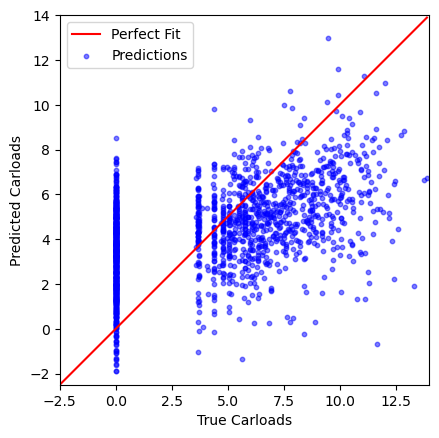

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.DataFrame()


# Train a linear regression model
reg = LinearRegression()
reg.fit(X_train_three, y_train)

# Model coefficients
beta_0 = reg.intercept_
beta_1, beta_2, beta_3 = reg.coef_
print(f"Intercept (β₀): {beta_0}")
print(f"Coefficient for log_GDP1 (β₁): {beta_1}")
print(f"Coefficient for log_GDP2 (β₂): {beta_2}")
print(f"Coefficient for log_Distance (β₃): {beta_3}")

# Predict trade flows
df["Predicted_log_Trade"] = reg.predict(X_test_three)
df["Predicted_Trade"] = np.exp(df["Predicted_log_Trade"])

# Evaluate the model
mse = mean_squared_error(y_test, df["Predicted_log_Trade"])
r2 = r2_score(y_test, df["Predicted_log_Trade"])
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Plot observed vs predicted trade
plt.plot([-10, max(y_test)], [-10, max(y_test)], color="red", linestyle="-", label="Perfect Fit")
plt.scatter(y_test, df["Predicted_log_Trade"], alpha=0.5, label="Predictions", color="blue", s=10)
plt.xlabel("True Carloads")
plt.ylabel("Predicted Carloads")

plt.axis("square")

lower=-2.5
plt.xlim(lower,14)
plt.ylim(lower,14)

plt.legend()
#plt.grid()

#plt.savefig("gravity_model_predicted_vs_actual.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [70]:
max(df["Predicted_log_Trade"])

12.972032706550678

Not fitting intercept

Intercept (β₀): 0.0
Coefficient for log_GDP1 (β₁): -1.6544227276433705
Coefficient for log_GDP2 (β₂): 0.19483952549602257
Coefficient for log_Distance (β₃): 0.6246862640760099
Mean Squared Error (MSE): 12.112804291693665
R-squared: 0.18110352036221344


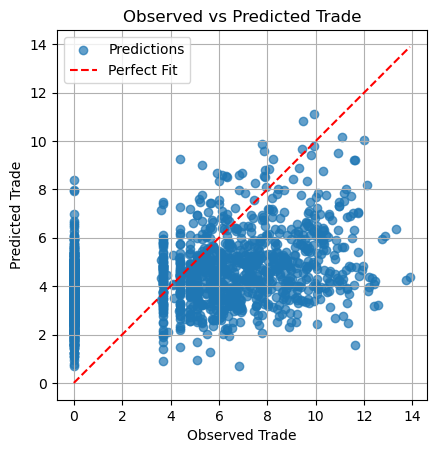

In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.DataFrame()


# Train a linear regression model
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_three, y_train)

# Model coefficients
beta_0 = reg.intercept_
beta_1, beta_2, beta_3 = reg.coef_
print(f"Intercept (β₀): {beta_0}")
print(f"Coefficient for log_GDP1 (β₁): {beta_1}")
print(f"Coefficient for log_GDP2 (β₂): {beta_2}")
print(f"Coefficient for log_Distance (β₃): {beta_3}")

# Predict trade flows
df["Predicted_log_Trade"] = reg.predict(X_test_three)
df["Predicted_Trade"] = np.exp(df["Predicted_log_Trade"])

# Evaluate the model
mse = mean_squared_error(y_test, df["Predicted_log_Trade"])
r2 = r2_score(y_test, df["Predicted_log_Trade"])
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Plot observed vs predicted trade
plt.scatter(y_test, df["Predicted_log_Trade"], alpha=0.7, label="Predictions")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Observed Trade")
plt.ylabel("Predicted Trade")
plt.title("Observed vs Predicted Trade")

plt.ylim(0,20)

plt.legend()
plt.grid()
plt.axis("square")
plt.show()

In [43]:
df

,Predicted_log_Trade,Predicted_Trade
0,10.831080,50568.269713
1,7.946435,2825.482721
2,7.577230,1953.210514
3,4.333377,76.201191
4,4.170714,64.761651
...,...,...
1676,3.582393,35.959483
1677,5.057304,157.166165
1678,5.400383,221.491261
1679,6.984168,1079.407774


## LASSO Test

Intercept (β₀): -23.71465655121296
Coefficient for log_GDP1 (β₁): -1.050104564709643
Coefficient for log_GDP2 (β₂): 0.7334255879858568
Coefficient for log_Distance (β₃): 1.1573823521829398
Mean Squared Error (MSE): 11.246777780844244
R-squared: 0.23965198229797757


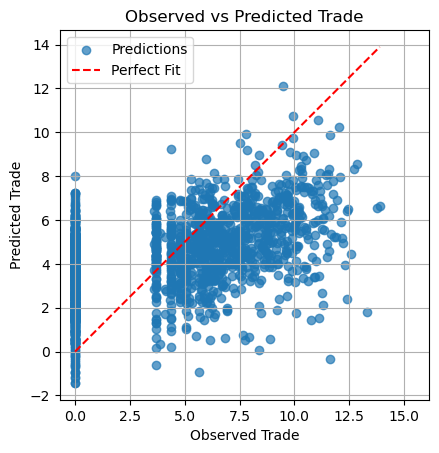

In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.DataFrame()


# Train a linear regression model
reg = Lasso(alpha=0.1)
reg.fit(X_train_three, y_train)

# Model coefficients
beta_0 = reg.intercept_
beta_1, beta_2, beta_3 = reg.coef_
print(f"Intercept (β₀): {beta_0}")
print(f"Coefficient for log_GDP1 (β₁): {beta_1}")
print(f"Coefficient for log_GDP2 (β₂): {beta_2}")
print(f"Coefficient for log_Distance (β₃): {beta_3}")

# Predict trade flows
df["Predicted_log_Trade"] = reg.predict(X_test_three)
df["Predicted_Trade"] = np.exp(df["Predicted_log_Trade"])

# Evaluate the model
mse = mean_squared_error(y_test, df["Predicted_log_Trade"])
r2 = r2_score(y_test, df["Predicted_log_Trade"])
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Plot observed vs predicted trade
plt.scatter(y_test, df["Predicted_log_Trade"], alpha=0.7, label="Predictions")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Observed Trade")
plt.ylabel("Predicted Trade")
plt.title("Observed vs Predicted Trade")

plt.ylim(0,20)

plt.legend()
plt.grid()
plt.axis("square")
plt.show()

## Poisson regression

Adapted for our data

Intercept (β₀): -5.419761608044758
Coefficient for log_GDP1 (β₁): -0.18532295784002353
Coefficient for log_GDP2 (β₂): 0.16699595846637877
Coefficient for log_Distance (β₃): 0.26691668593538836
Mean Squared Error (MSE): 11.272047623655757
R-squared: 0.2379435929918332


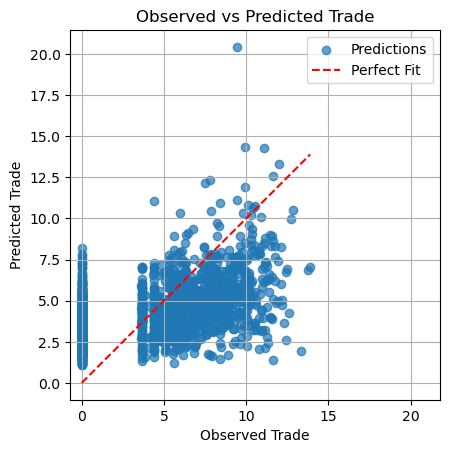

In [45]:
import numpy as np
import pandas as pd
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.DataFrame()


# Train a linear regression model
reg = PoissonRegressor(alpha=1)#fit_intercept=False)
reg.fit(X_train_three, y_train)

# Model coefficients
beta_0 = reg.intercept_
beta_1, beta_2, beta_3 = reg.coef_
print(f"Intercept (β₀): {beta_0}")
print(f"Coefficient for log_GDP1 (β₁): {beta_1}")
print(f"Coefficient for log_GDP2 (β₂): {beta_2}")
print(f"Coefficient for log_Distance (β₃): {beta_3}")

# Predict trade flows
df["Predicted_log_Trade"] = reg.predict(X_test_three)
df["Predicted_Trade"] = np.exp(df["Predicted_log_Trade"])

# Evaluate the model
mse = mean_squared_error(y_test, df["Predicted_log_Trade"])
r2 = r2_score(y_test, df["Predicted_log_Trade"])
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Plot observed vs predicted trade
plt.scatter(y_test, df["Predicted_log_Trade"], alpha=0.7, label="Predictions")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Observed Trade")
plt.ylabel("Predicted Trade")
plt.title("Observed vs Predicted Trade")

plt.ylim(0,20)

plt.legend()
plt.grid()
plt.axis("square")
plt.show()

Intercept (β₀): 0.0
Coefficient for log_GDP1 (β₁): -0.2502203520815195
Coefficient for log_GDP2 (β₂): 0.03583438071065552
Coefficient for log_Distance (β₃): 0.12986138553001014
Mean Squared Error (MSE): 12.176322171210368
R-squared: 0.17680933986711922


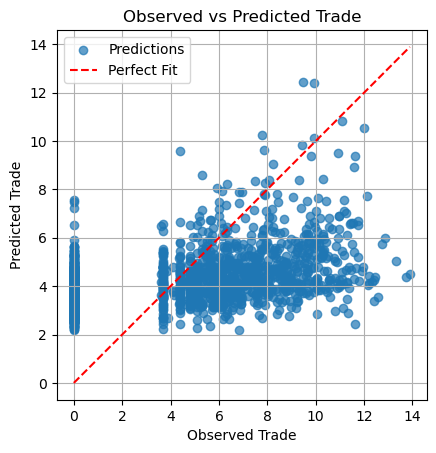

In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.DataFrame()


# Train a linear regression model
reg = PoissonRegressor(alpha=1,fit_intercept=False)#fit_intercept=False)
reg.fit(X_train_three, y_train)

# Model coefficients
beta_0 = reg.intercept_
beta_1, beta_2, beta_3 = reg.coef_
print(f"Intercept (β₀): {beta_0}")
print(f"Coefficient for log_GDP1 (β₁): {beta_1}")
print(f"Coefficient for log_GDP2 (β₂): {beta_2}")
print(f"Coefficient for log_Distance (β₃): {beta_3}")

# Predict trade flows
df["Predicted_log_Trade"] = reg.predict(X_test_three)
df["Predicted_Trade"] = np.exp(df["Predicted_log_Trade"])

# Evaluate the model
mse = mean_squared_error(y_test, df["Predicted_log_Trade"])
r2 = r2_score(y_test, df["Predicted_log_Trade"])
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Plot observed vs predicted trade
plt.scatter(y_test, df["Predicted_log_Trade"], alpha=0.7, label="Predictions")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Observed Trade")
plt.ylabel("Predicted Trade")
plt.title("Observed vs Predicted Trade")

plt.ylim(0,20)

plt.legend()
plt.grid()
plt.axis("square")
plt.show()